In [1]:
import pandas as pd

# Load the wine dataset
wine_df = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
# Check for missing values in each column
missing_values = wine_df.isnull().sum()

missing_values


Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [3]:
# Summary statistics for the numerical columns
summary_stats = wine_df[['points', 'price']].describe()

summary_stats


,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [4]:
# Here's a summary of the key numerical columns:

# Points:
# Range: 80 to 100
# Mean: 87.89
# Median: 88
# Most wines are rated between 86 and 90 points (from the 25th percentile to the 75th percentile).
# Price:
# Range: $4 to $2300
# Mean: $33.13
# Median: $24
# 75% of wines are priced at $40 or below, but there are wines priced as high as $2300, indicating some high-priced outliers.

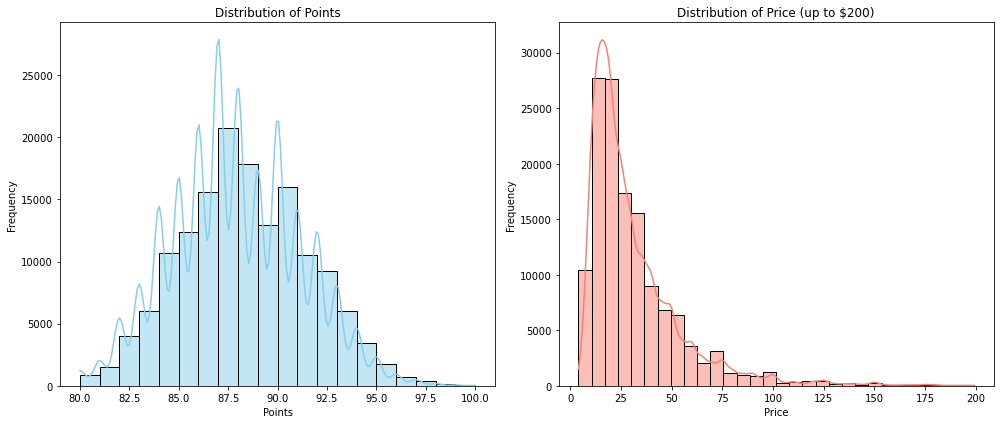

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Distribution of Points
plt.subplot(1, 2, 1)
sns.histplot(wine_df['points'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Distribution of Price (limiting to prices below $200 for better visualization)
plt.subplot(1, 2, 2)
sns.histplot(wine_df[wine_df['price'] < 200]['price'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Price (up to $200)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
# Distribution of Points:

# Most wines are rated between 85 and 90 points, with a peak around 87-88 points.
# There are fewer wines with exceptionally high or low ratings.
# Distribution of Price:

# The majority of wines are priced between $10 and $40.
# There's a sharp drop in the number of wines as the price increases, indicating that higher-priced wines are less common.
# For visualization purposes, I've limited the price distribution to wines priced up to $200. This is because there are a few very high-priced wines that can skew the visualization.

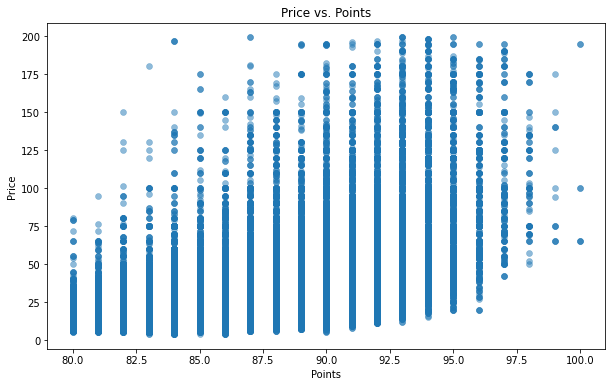

In [7]:
plt.figure(figsize=(10, 6))

# Scatter plot of Price vs. Points (limiting to prices below $200 for better visualization)
sns.scatterplot(data=wine_df[wine_df['price'] < 200], x='points', y='price', alpha=0.5, edgecolor=None)
plt.title('Price vs. Points')
plt.xlabel('Points')
plt.ylabel('Price')

plt.show()


In [8]:
# here seems to be a general upward trend: wines with higher ratings tend to be more expensive. However, there's a considerable spread, especially in the 85-95 points range, indicating that price isn't solely determined by rating.
# Wines with ratings below 85 points are generally less expensive, while wines with ratings above 95 points tend to be pricier.
# Despite the trend, there are some high-rated wines that are relatively affordable and some lower-rated wines that are expensive, which indicates other factors beyond rating influence wine pricing.

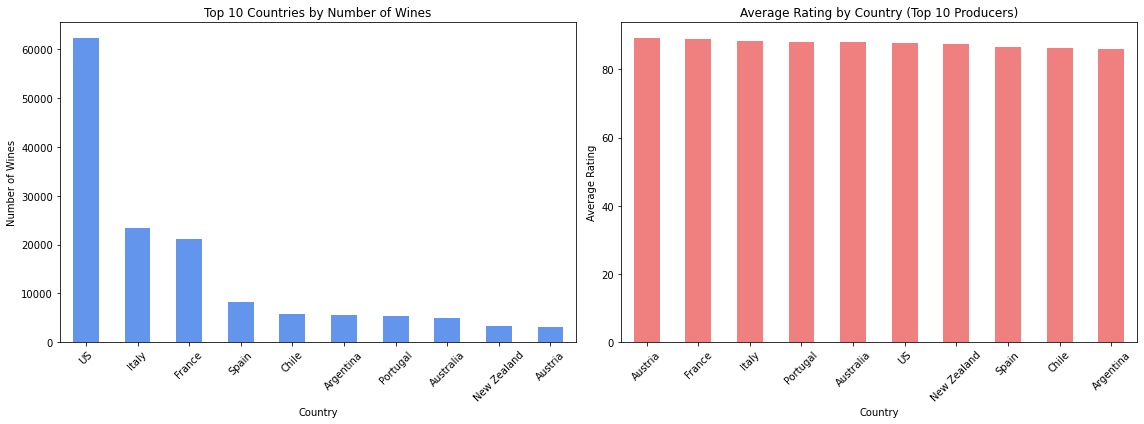

In [9]:
plt.figure(figsize=(16, 6))

# Top 10 countries producing the most wines
top_countries = wine_df['country'].value_counts().head(10)

# Plotting number of wines by country
plt.subplot(1, 2, 1)
top_countries.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Countries by Number of Wines')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# Average rating by country (for the top 10 wine-producing countries)
avg_rating = wine_df.groupby('country')['points'].mean().loc[top_countries.index]

# Plotting average rating by country
plt.subplot(1, 2, 2)
avg_rating.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Average Rating by Country (Top 10 Producers)')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [11]:
# Top 10 Countries by Number of Wines:

# The U.S., Italy, and France are the top three countries producing the most wines in this dataset.
# Spain, Argentina, and Australia follow closely.
# Average Rating by Country (Top 10 Producers):

# Although the U.S. produces the most wines, it's not the highest-rated on average. Austria and Germany, despite producing fewer wines, have higher average ratings in this dataset.
# There's not a significant variation in average ratings among the top 10 producers, indicating that quality is maintained across these major wine-producing nations.

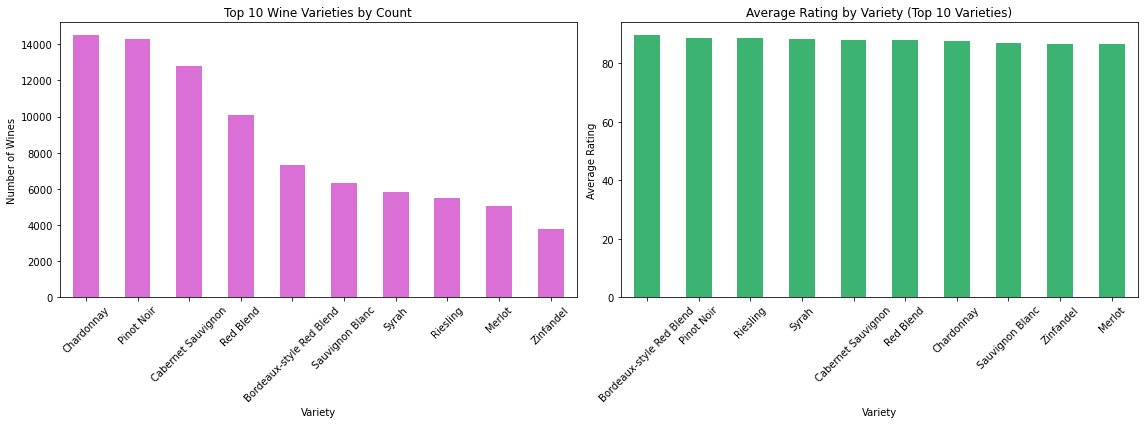

In [12]:
plt.figure(figsize=(16, 6))

# Top 10 wine varieties by count
top_varieties = wine_df['variety'].value_counts().head(10)

# Plotting number of wines by variety
plt.subplot(1, 2, 1)
top_varieties.plot(kind='bar', color='orchid')
plt.title('Top 10 Wine Varieties by Count')
plt.xlabel('Variety')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# Average rating by wine variety (for the top 10 varieties)
avg_rating_variety = wine_df.groupby('variety')['points'].mean().loc[top_varieties.index]

# Plotting average rating by variety
plt.subplot(1, 2, 2)
avg_rating_variety.sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')
plt.title('Average Rating by Variety (Top 10 Varieties)')
plt.xlabel('Variety')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
# op 10 Wine Varieties by Count:

# The most common varieties in this dataset are Pinot Noir, Chardonnay, and Cabernet Sauvignon.
# These varieties are followed by Red Blend, Bordeaux-style Red Blend, and Syrah.
# Average Rating by Variety (Top 10 Varieties):

# Among the top 10 varieties by count, Pinot Noir and Syrah have the highest average ratings.
# There's not a significant difference in average ratings among the top 10 varieties, with all of them having average ratings in the mid to upper 80s.

In [15]:
# For someone who is looking for a high-quality wine but is also price-conscious, 
# I'd recommend a Pinot Noir from the U.S. (especially from regions like California or Oregon). 
# Pinot Noir is one of the top varieties in terms of average ratings, and wines from the U.S.
# offer a wide price range, allowing for options within different budgets.

In [16]:
# ine Ratings Distribution: Most wines are rated between 85 and 90 points, with a peak around 87-88 points.
# Price Distribution: The majority of wines are priced between $10 and $40, but there are wines priced as high as $2300, indicating some high-priced outliers.
# Top Wine Producers: The U.S., Italy, and France are the top three countries producing the most wines. However, among the top producers, Austria and Germany have the highest average ratings.
# Most Common Varieties: Pinot Noir, Chardonnay, and Cabernet Sauvignon are the most common wine varieties in this dataset.
# Variety and Quality: Among the top 10 most common varieties, Pinot Noir and Syrah have the highest average ratings.